../runners/results/lvis_maskclip_default_flat_128_2/lvis_maskclip_default128_k3_test_n8_10_flat.pkl.json
../runners/results/lvis_maskclip_default_flat_128_2/lvis_maskclip_default128_k3_test_n1_10_flat.pkl.json
../runners/results/lvis_maskclip_default_flat_128_2/lvis_maskclip_default128_k3_test_n2_10_flat.pkl.json
../runners/results/lvis_maskclip_default_flat_128_2/lvis_maskclip_default128_k3_test_n4_10_flat.pkl.json


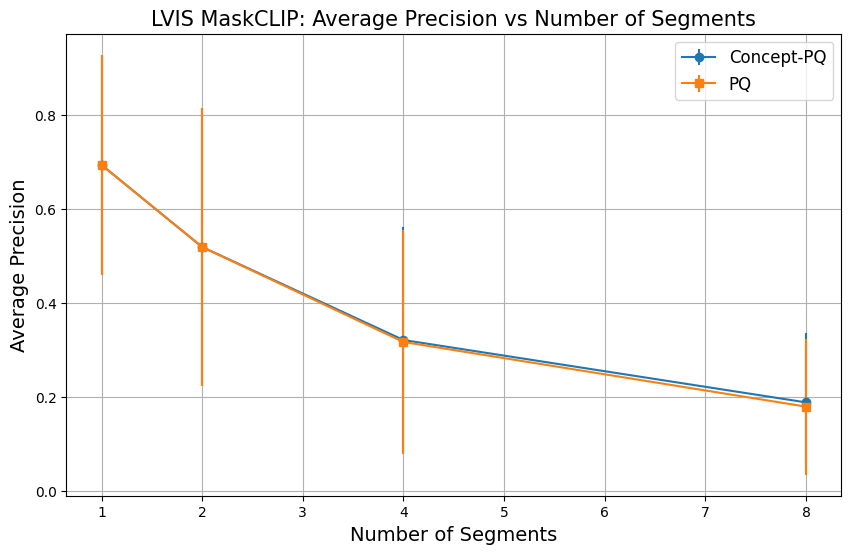

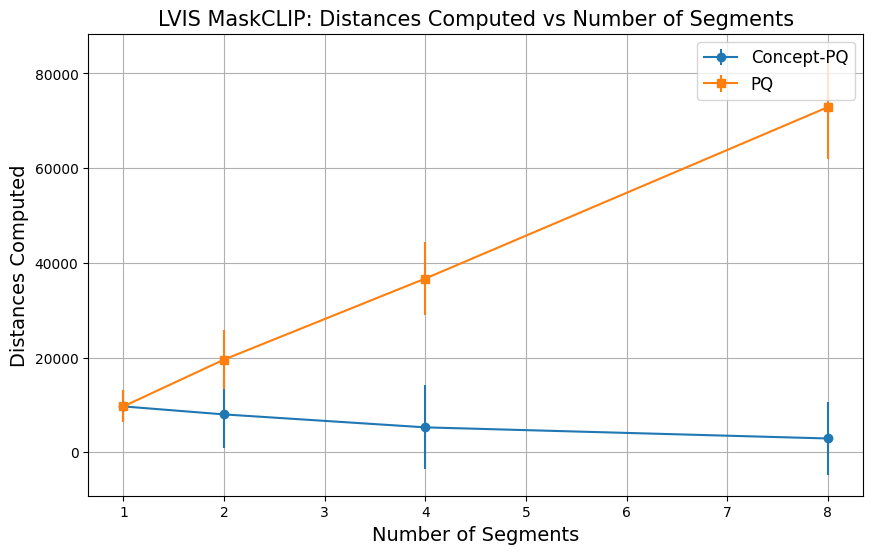

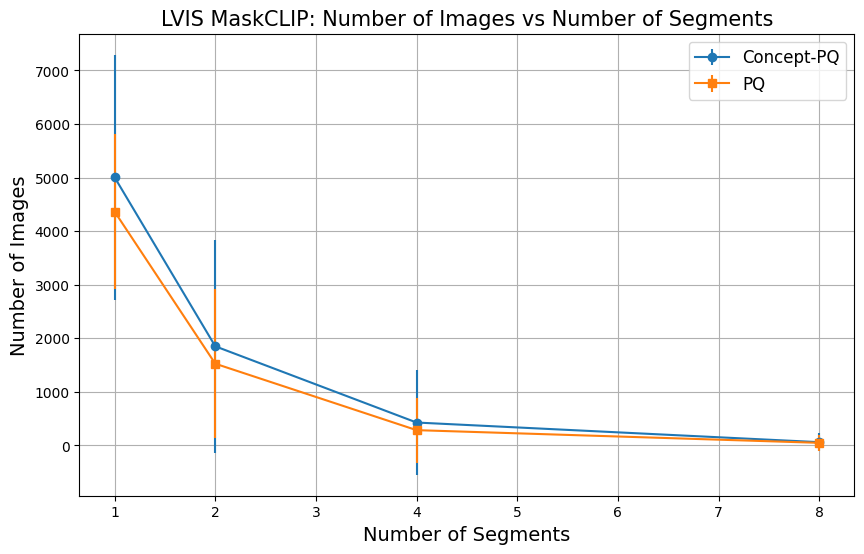

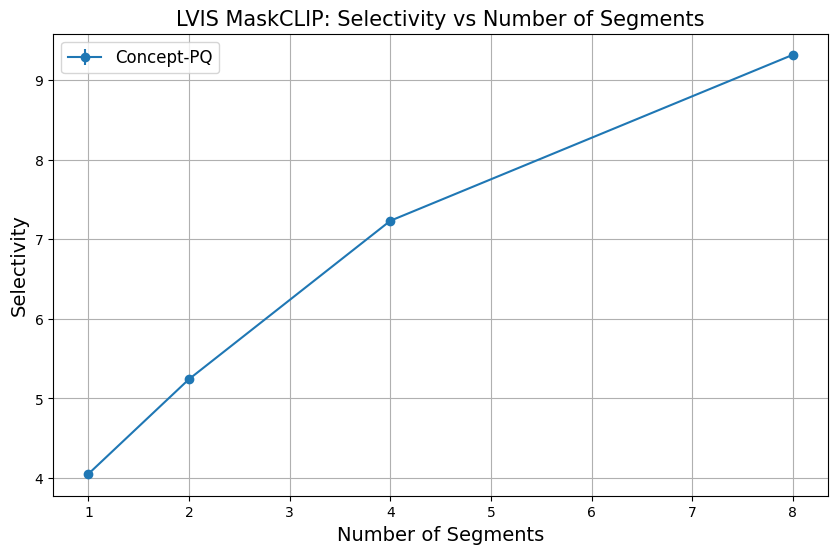

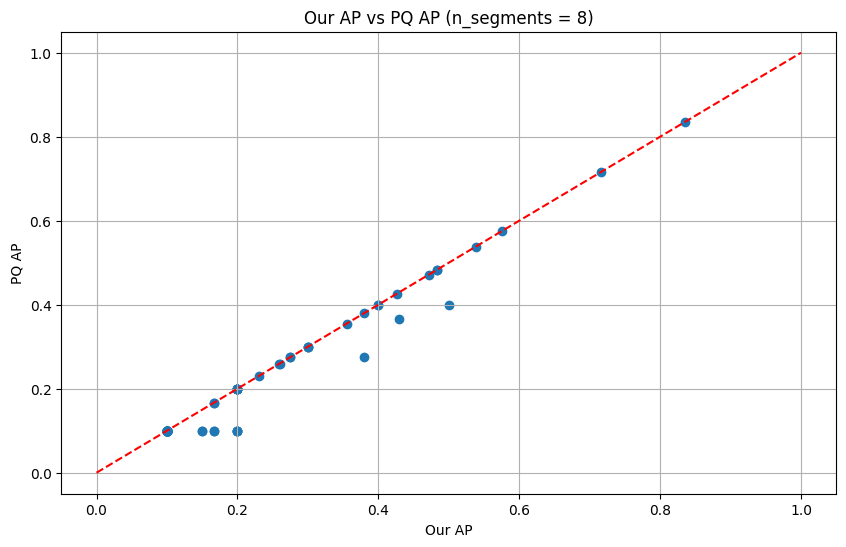

In [3]:
import numpy as np
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load all JSON files
json_files = glob.glob('../runners/results/lvis_maskclip_default_flat_128_2/*.json')
data = []

for file in json_files:
    with open(file, 'r') as f:
        json_data = json.load(f)
        print(file)
        n_segments = int(file.split('_n')[-1].split('_')[0])
        data.append({
            'n_segments': n_segments,
            'data': json_data
        })

# Sort data by n_segments
data.sort(key=lambda x: x['n_segments'])

# Extract summary statistics
summary_stats = []
for item in data:
    n_segments = item['n_segments']
    stats = item['data'][f'n_segments_{n_segments}']
    summary_stats.append({
        'n_segments': n_segments,
        'our_ap_mean': stats['our_ap']['mean'],
        'our_ap_std': stats['our_ap']['std'],
        'pq_ap_mean': stats['pq_ap']['mean'],
        'pq_ap_std': stats['pq_ap']['std'],
        'our_counters_mean': stats['our_counters']['mean'],
        'our_counters_std': stats['our_counters']['std'],
        'pq_counters_mean': stats['pq_counters']['mean'],
        'pq_counters_std': stats['pq_counters']['std'],
        'our_selectivities_mean': stats['our_selectivities']['mean'],
        'our_selectivities_std': stats['our_selectivities']['std'],
        'our_n_imgs_mean': stats['our_n_imgs']['mean'],
        'our_n_imgs_std': stats['our_n_imgs']['std'],
        'pq_n_imgs_mean': stats['pq_n_imgs']['mean'],
        'pq_n_imgs_std': stats['pq_n_imgs']['std']
    })

df_summary = pd.DataFrame(summary_stats)

# Plotting functions
def plot_metric_comparison(df, metric, ylabel, dataset_name='LVIS MaskCLIP'):
    plt.figure(figsize=(10, 6))
    plt.errorbar(df['n_segments'], df[f'our_{metric}_mean'], yerr=df[f'our_{metric}_std'], label='Concept-PQ', marker='o')
    plt.errorbar(df['n_segments'], df[f'pq_{metric}_mean'], yerr=df[f'pq_{metric}_std'], label='PQ', marker='s')
    plt.xlabel('Number of Segments', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(f'{dataset_name}: {ylabel} vs Number of Segments', fontsize=15)
    plt.legend(fontsize=12)
    # plt.xscale('log')
    plt.grid(True)
    plt.show()

def plot_selectivity(df, dataset_name='LVIS MaskCLIP'):
    plt.figure(figsize=(10, 6))
    df['our_selectivities_mean'] = np.log(1 / df['our_selectivities_mean'])
    plt.errorbar(df['n_segments'], df['our_selectivities_mean'], yerr=df['our_selectivities_std'], label='Concept-PQ', marker='o')
    # plt.errorbar(df['n_segments'], df['pq_selectivities_mean'], yerr=df['pq_selectivities_std'], label='PQ', marker='s')
    plt.xlabel('Number of Segments', fontsize=14)
    plt.ylabel('Selectivity', fontsize=14)
    plt.title(f'{dataset_name}: Selectivity vs Number of Segments', fontsize=15)
    plt.legend(fontsize=12)
    # plt.xscale('log')
    plt.grid(True)
    plt.show()

# Generate plots
plot_metric_comparison(df_summary, 'ap', 'Average Precision')
plot_metric_comparison(df_summary, 'counters', 'Distances Computed')
plot_metric_comparison(df_summary, 'n_imgs', 'Number of Images')
plot_selectivity(df_summary)

# Detailed analysis for a specific n_segments value (e.g., 8)
n_segments_detail = 8
detail_data = next(item for item in data if item['n_segments'] == n_segments_detail)
raw_data = detail_data['data'][f'n_segments_{n_segments_detail}_raw']

df_detail = pd.DataFrame({
    'our_ap': raw_data['our_ap'],
    'pq_ap': raw_data['pq_ap'],
    'our_counters': raw_data['our_counters'],
    'pq_counters': raw_data['pq_counters'],
    'our_selectivities': raw_data['our_selectivities'],
    'our_n_imgs': raw_data['our_n_imgs'],
    'pq_n_imgs': raw_data['pq_n_imgs']
})

# Scatter plot of our_ap vs pq_ap
plt.figure(figsize=(10, 6))
plt.scatter(df_detail['our_ap'], df_detail['pq_ap'])
plt.xlabel('Our AP')
plt.ylabel('PQ AP')
plt.title(f'Our AP vs PQ AP (n_segments = {n_segments_detail})')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.grid(True)
plt.show()



../runners/bddtrain_fixed_maskclip/thousand_twenty_probe/bddtrain_fixed_maskclip_thousand_twenty_probe_k3_test_n1_10.pkl.json
../runners/bddtrain_fixed_maskclip/thousand_twenty_probe_1/bddtrain_fixed_maskclip_thousand_twenty_probe_k3_test_n2_10.pkl.json


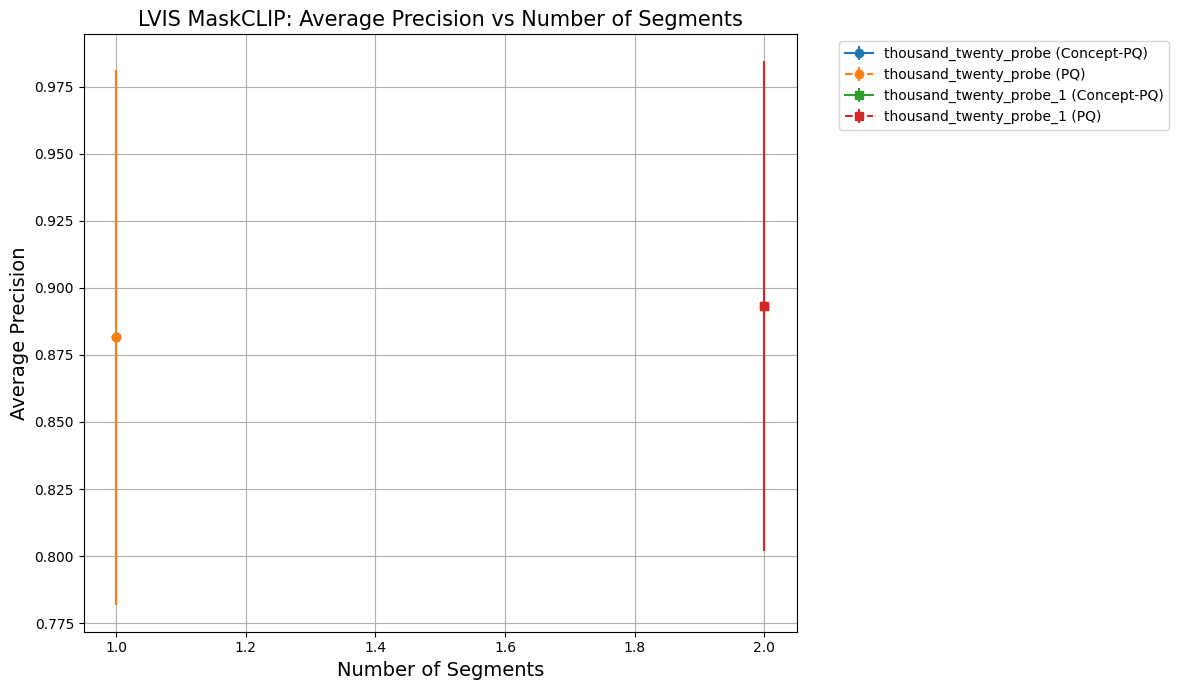

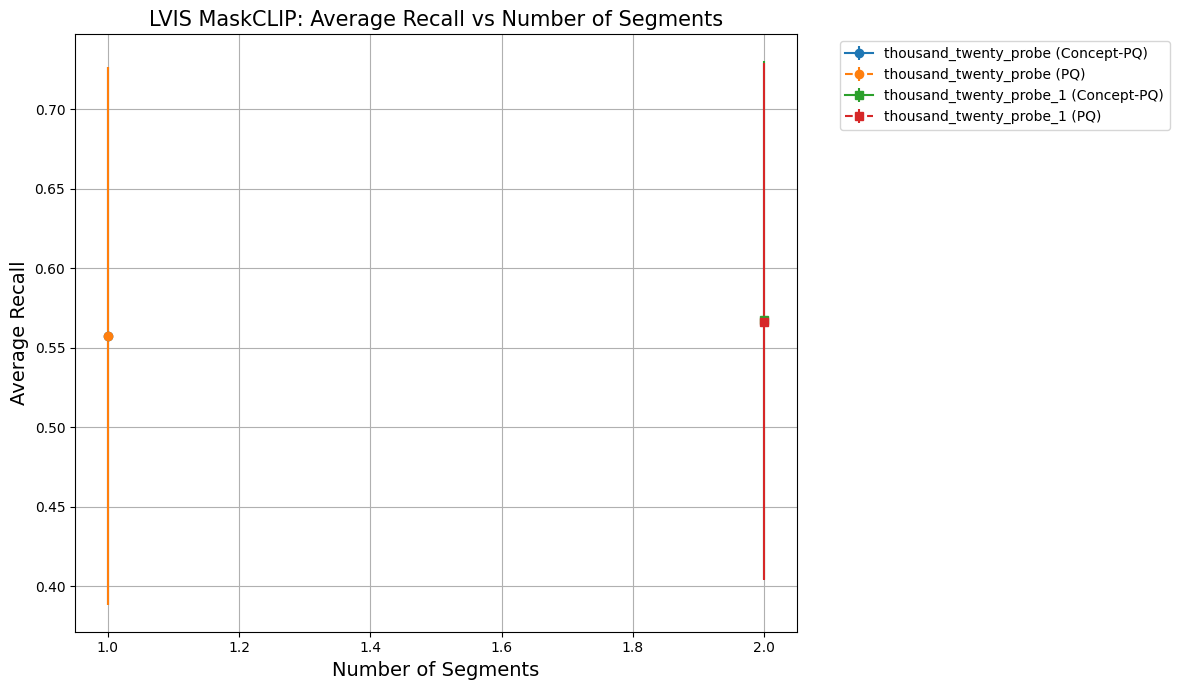

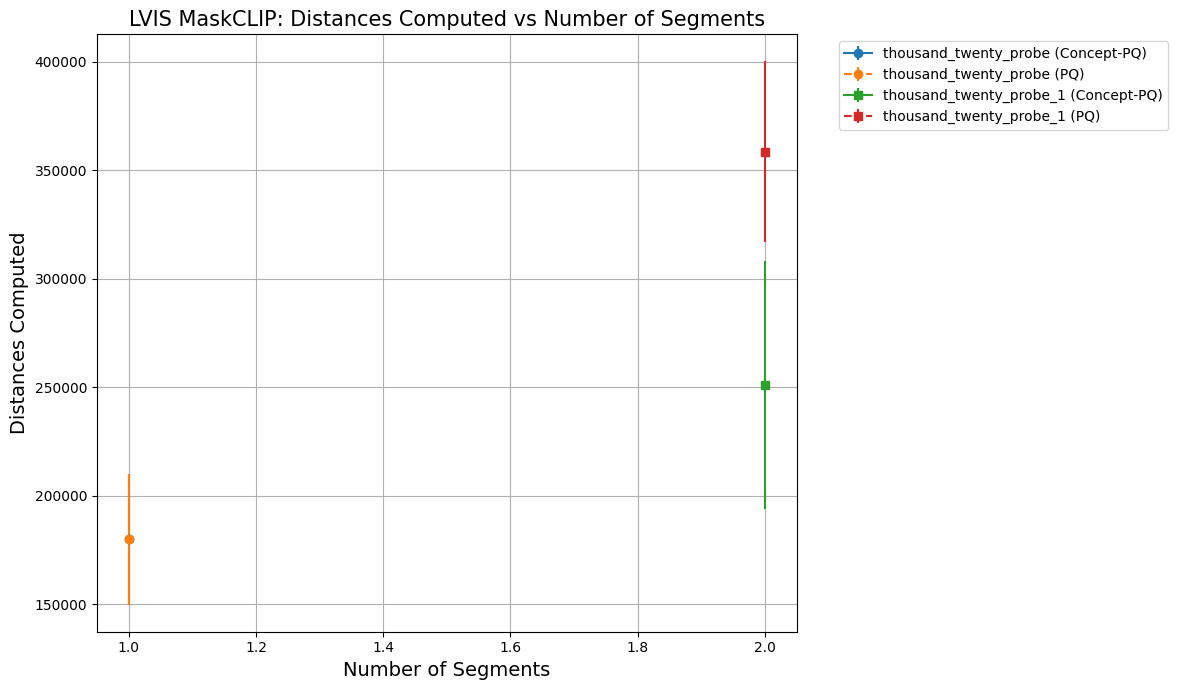

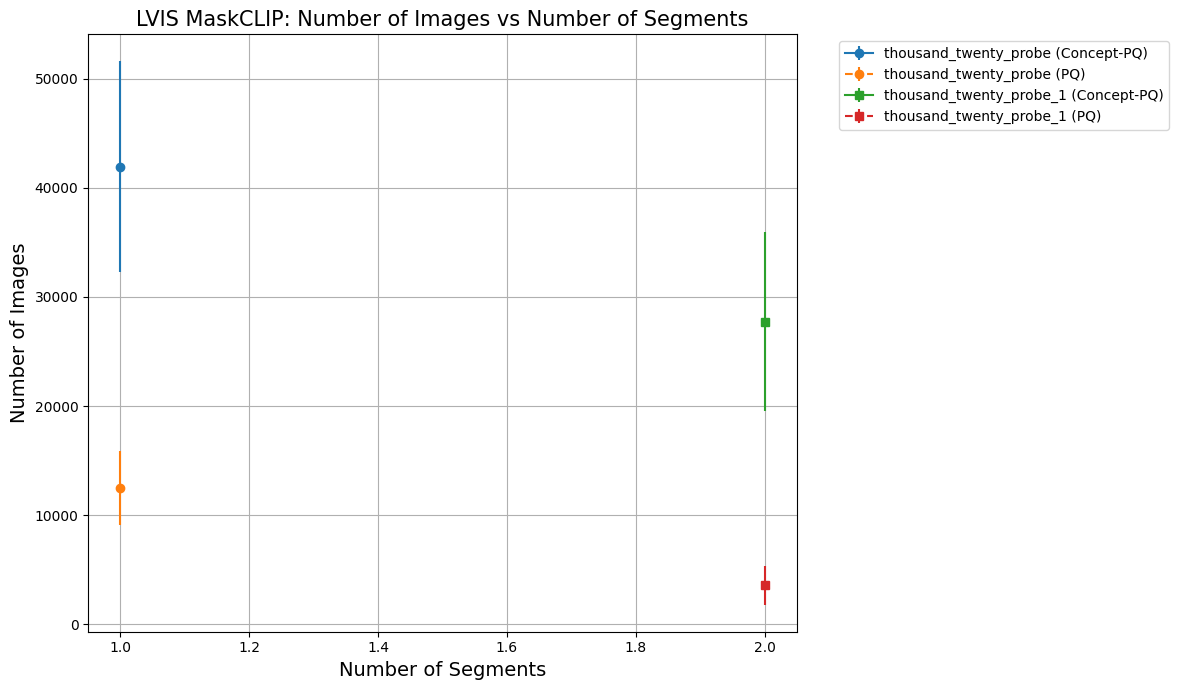

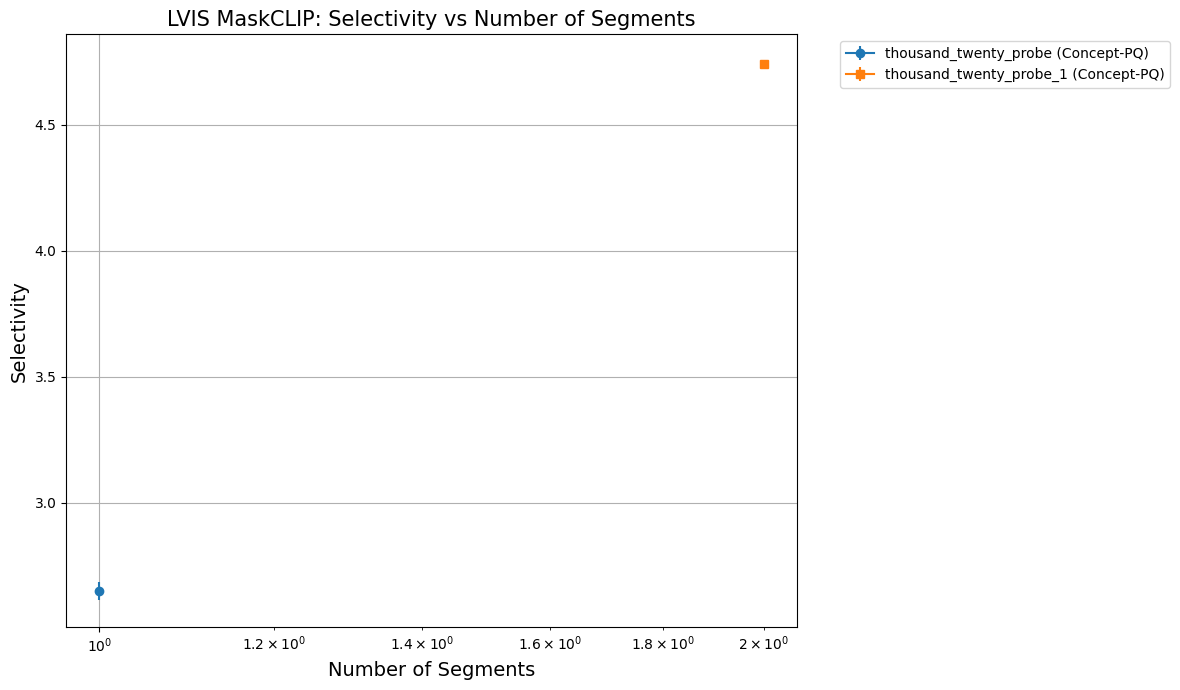

StopIteration: 

In [52]:
import numpy as np
import json
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_test_data(base_path):
    test_folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
    all_data = {}

    for folder in test_folders:
        json_files = glob.glob(os.path.join(base_path, folder, '*.json'))
        data = []

        for file in json_files:
            with open(file, 'r') as f:
                json_data = json.load(f)
                print(file)
                n_segments = int(file.split('_n')[-1].split('_')[0])
                data.append({
                    'n_segments': n_segments,
                    'data': json_data
                })

        # Sort data by n_segments
        data.sort(key=lambda x: x['n_segments'])
        all_data[folder] = data

    return all_data

def extract_summary_stats(data):
    summary_stats = []
    for item in data:
        n_segments = item['n_segments']
        stats = item['data'][f'n_segments_{n_segments}']
        if 'ivf_ap' not in stats:
            stats['ivf_ap'] = {'mean': -1, 'std': 0}
            stats['ivf_ar'] = {'mean': -1, 'std': 0}
            stats['ivf_counters'] = {'mean': -1, 'std': 0}
            stats['ivf_selectivities'] = {'mean': -1, 'std': 0}
            stats['ivf_n_imgs'] = {'mean': -1, 'std': 0}
        summary_stats.append({
            'n_segments': n_segments,
            'our_ap_mean': stats['our_ap']['mean'],
            'our_ap_std': stats['our_ap']['std'],
            'our_ar_mean': stats['our_ar']['mean'],
            'our_ar_std': stats['our_ar']['std'],
            'pq_ap_mean': stats['pq_ap']['mean'],
            'pq_ap_std': stats['pq_ap']['std'],
            'pq_ar_mean': stats['pq_ar']['mean'],
            'pq_ar_std': stats['pq_ar']['std'],
            'ivf_ap_mean': stats['ivf_ap']['mean'],
            'ivf_ap_std': stats['ivf_ap']['std'],
            'ivf_ar_mean': stats['ivf_ar']['mean'],
            'ivf_ar_std': stats['ivf_ar']['std'],
            'ivf_counters_mean': stats['ivf_counters']['mean'],
            'ivf_counters_std': stats['ivf_counters']['std'],
            'ivf_selectivities_mean': stats['ivf_selectivities']['mean'],
            'ivf_selectivities_std': stats['ivf_selectivities']['std'],
            'ivf_n_imgs_mean': stats['ivf_n_imgs']['mean'],
            'ivf_n_imgs_std': stats['ivf_n_imgs']['std'],
            'our_counters_mean': stats['our_counters']['mean'],
            'our_counters_std': stats['our_counters']['std'],
            'pq_counters_mean': stats['pq_counters']['mean'],
            'pq_counters_std': stats['pq_counters']['std'],
            'our_selectivities_mean': stats['our_selectivities']['mean'],
            'our_selectivities_std': stats['our_selectivities']['std'],
            'our_n_imgs_mean': stats['our_n_imgs']['mean'],
            'our_n_imgs_std': stats['our_n_imgs']['std'],
            'pq_n_imgs_mean': stats['pq_n_imgs']['mean'],
            'pq_n_imgs_std': stats['pq_n_imgs']['std'],
        })
    return pd.DataFrame(summary_stats)

def plot_metric_comparison(dfs, metric, ylabel, dataset_name='LVIS MaskCLIP'):
    plt.figure(figsize=(12, 7))
    markers = ['o', 's', '^', 'D', 'v']
    for i, (test_name, df) in enumerate(dfs.items()):
        plt.errorbar(df['n_segments'], df[f'our_{metric}_mean'], yerr=df[f'our_{metric}_std'], 
                     label=f'{test_name} (Concept-PQ)', marker=markers[i], linestyle='-')
        plt.errorbar(df['n_segments'], df[f'pq_{metric}_mean'], yerr=df[f'pq_{metric}_std'], 
                     label=f'{test_name} (PQ)', marker=markers[i], linestyle='--')
    
    plt.xlabel('Number of Segments', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(f'{dataset_name}: {ylabel} vs Number of Segments', fontsize=15)
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.xscale('log')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_selectivity(dfs, dataset_name='LVIS MaskCLIP'):
    plt.figure(figsize=(12, 7))
    markers = ['o', 's', '^', 'D', 'v']
    for i, (test_name, df) in enumerate(dfs.items()):
        df['our_selectivities_mean'] = np.log(1 / df['our_selectivities_mean'])
        plt.errorbar(df['n_segments'], df['our_selectivities_mean'], yerr=df['our_selectivities_std'], 
                     label=f'{test_name} (Concept-PQ)', marker=markers[i])
    
    plt.xlabel('Number of Segments', fontsize=14)
    plt.ylabel('Selectivity', fontsize=14)
    plt.title(f'{dataset_name}: Selectivity vs Number of Segments', fontsize=15)
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xscale('log')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main execution
base_path = '../runners/bddtrain_fixed_maskclip'
all_data = load_test_data(base_path)

dfs_summary = {test_name: extract_summary_stats(data) for test_name, data in all_data.items()}

# Generate plots
plot_metric_comparison(dfs_summary, 'ap', 'Average Precision')
plot_metric_comparison(dfs_summary, 'ar', 'Average Recall')
plot_metric_comparison(dfs_summary, 'counters', 'Distances Computed')
plot_metric_comparison(dfs_summary, 'n_imgs', 'Number of Images')
plot_selectivity(dfs_summary)

# Detailed analysis for a specific n_segments value (e.g., 8) for the first test set
n_segments_detail = 8
first_test_name = list(all_data.keys())[0]
detail_data = next(item for item in all_data[first_test_name] if item['n_segments'] == n_segments_detail)
raw_data = detail_data['data'][f'n_segments_{n_segments_detail}_raw']

df_detail = pd.DataFrame({
    'our_ap': raw_data['our_ap'],
    'pq_ap': raw_data['pq_ap'],
    'our_counters': raw_data['our_counters'],
    'pq_counters': raw_data['pq_counters'],
    'our_selectivities': raw_data['our_selectivities'],
    'our_n_imgs': raw_data['our_n_imgs'],
    'pq_n_imgs': raw_data['pq_n_imgs']
})

# Scatter plot of our_ap vs pq_ap
plt.figure(figsize=(10, 6))
plt.scatter(df_detail['our_ap'], df_detail['pq_ap'])
plt.xlabel('Our AP')
plt.ylabel('PQ AP')
plt.title(f'Our AP vs PQ AP (n_segments = {n_segments_detail}, Test: {first_test_name})')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.grid(True)
plt.show()

/tmp/ipykernel_816813/3165250034.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')


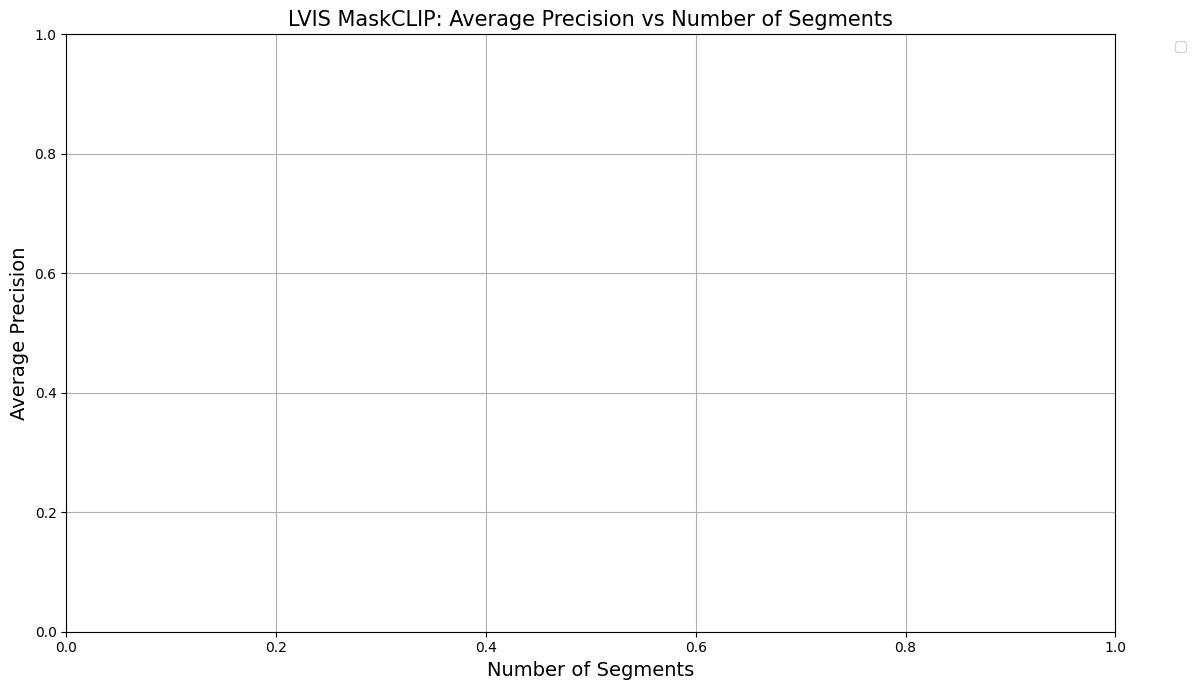

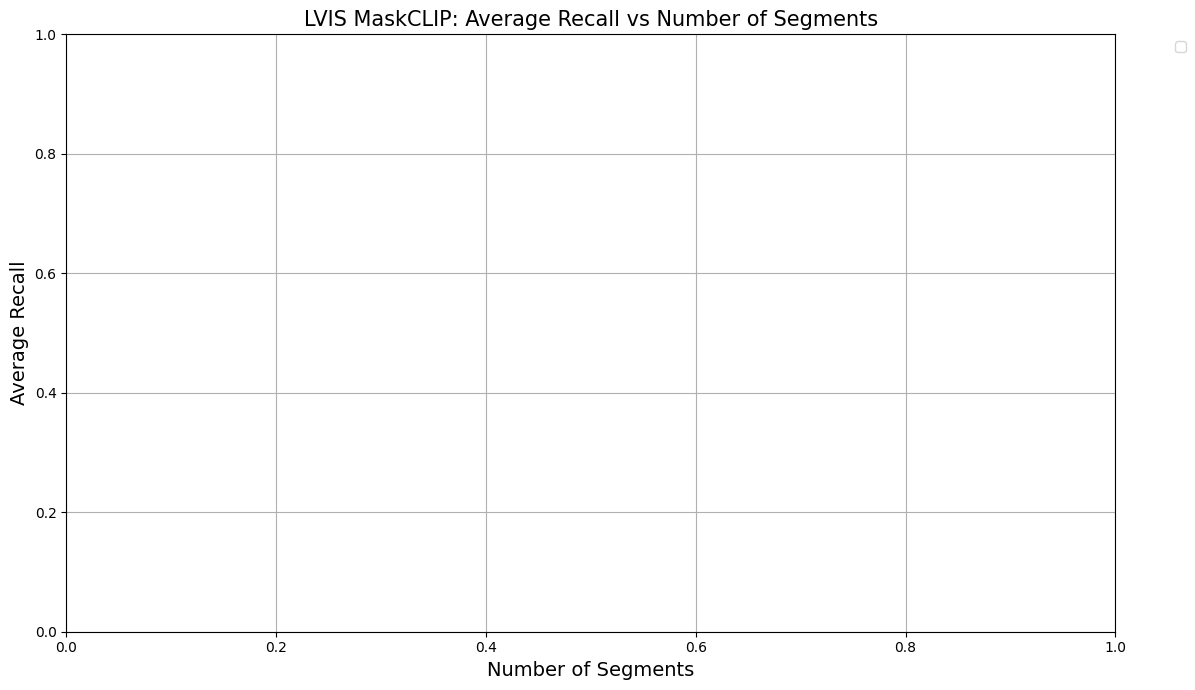

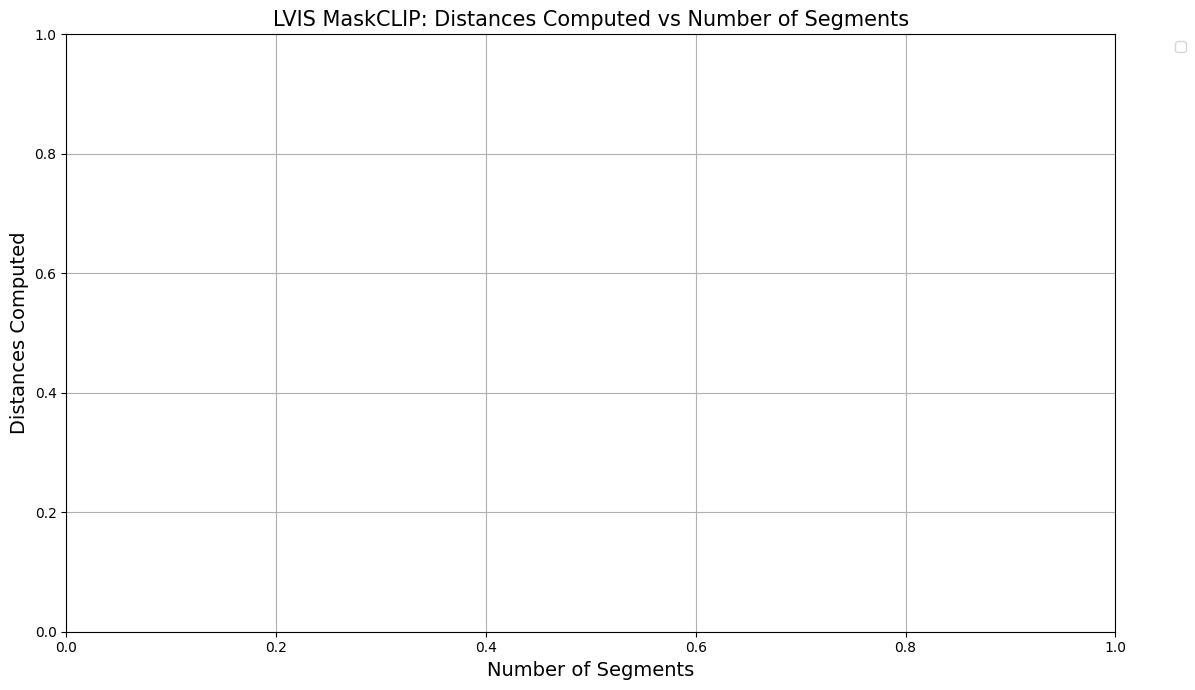

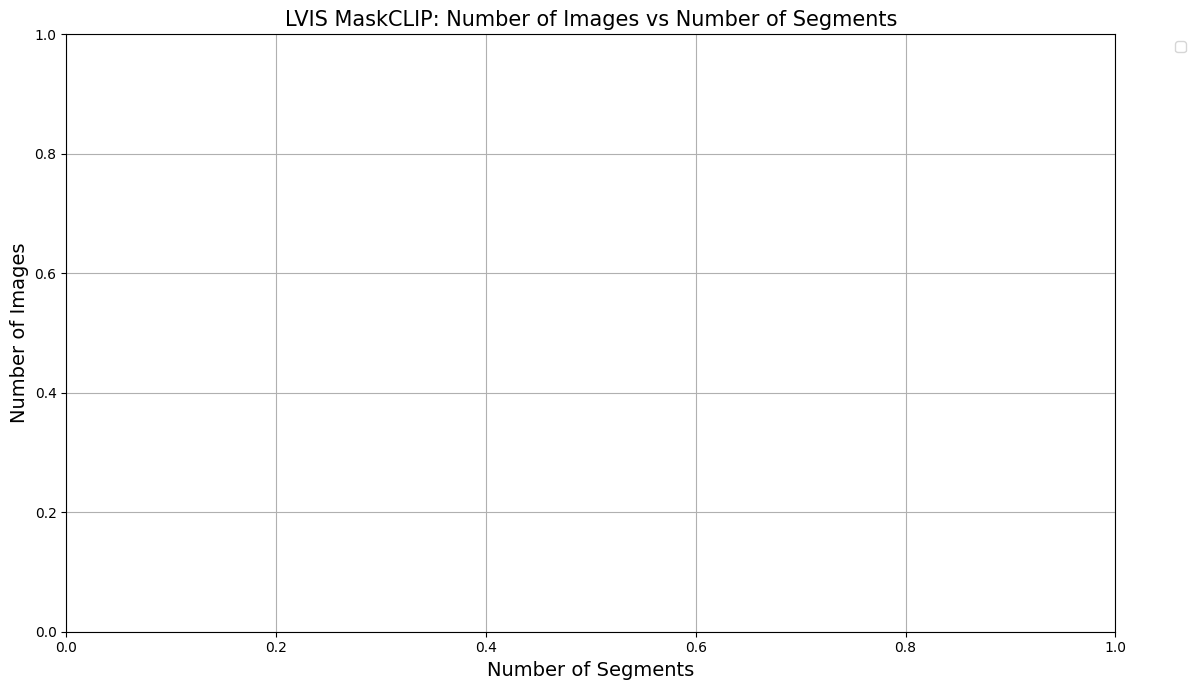

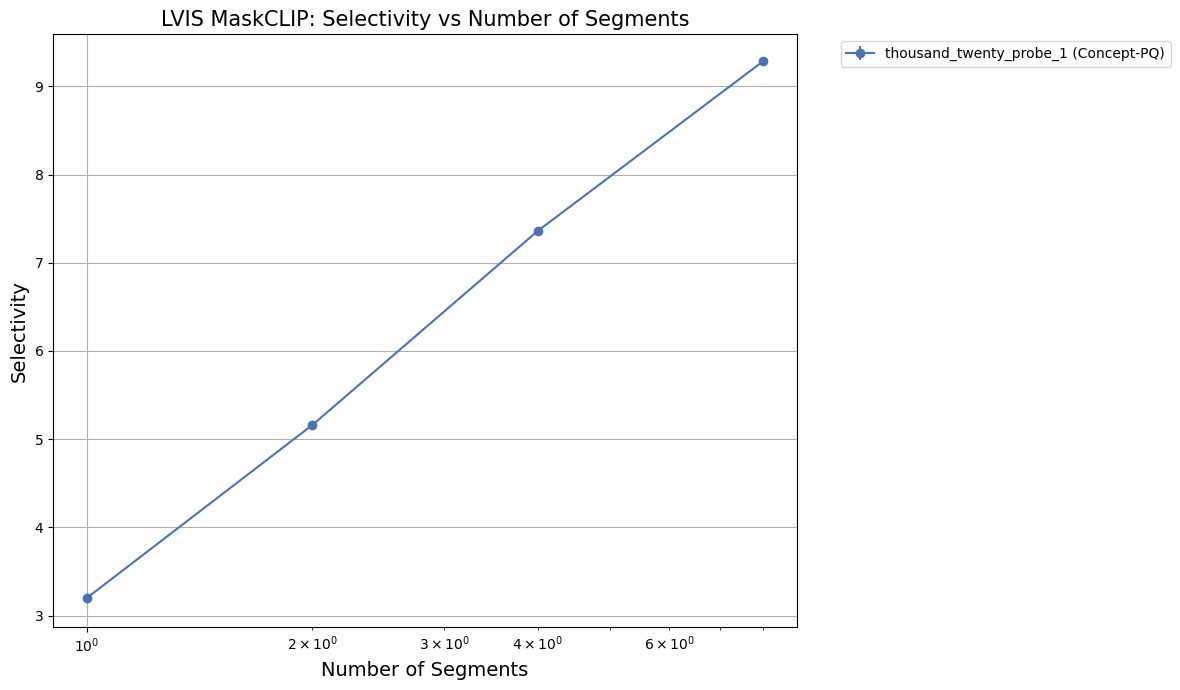

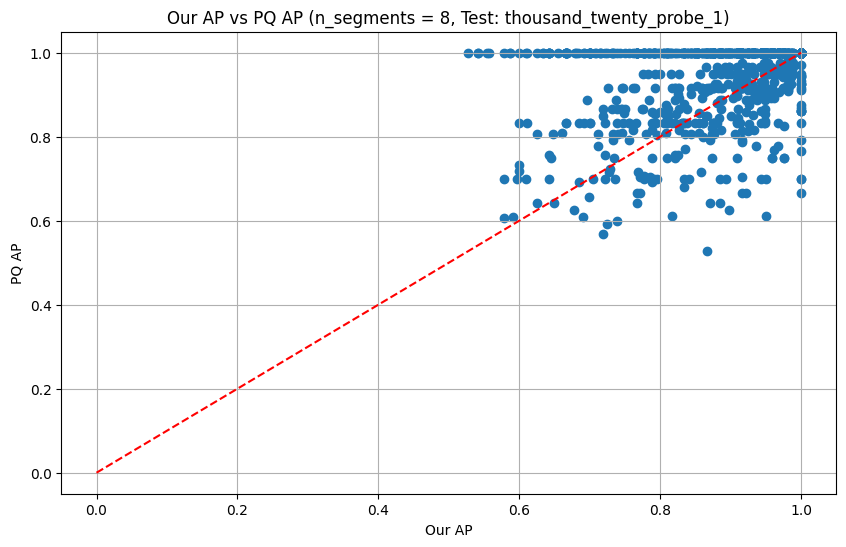

In [7]:
import numpy as np
import json
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_test_data(base_path):
    test_folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
    all_data = {}

    for folder in test_folders:
        json_files = glob.glob(os.path.join(base_path, folder, '*.json'))
        data = []

        for file in json_files:
            with open(file, 'r') as f:
                json_data = json.load(f)
                # print(file)
                n_segments = int(file.split('_n')[-1].split('_')[0])
                data.append({
                    'n_segments': n_segments,
                    'data': json_data
                })
        if len(data) == 0:
            continue

        # Sort data by n_segments
        data.sort(key=lambda x: x['n_segments'])
        all_data[folder] = data

    return all_data

def extract_summary_stats(data):
    summary_stats = []
    for item in data:
        n_segments = item['n_segments']
        stats = item['data'][f'n_segments_{n_segments}']
        # print(stats)
        if 'ivf_ap' not in stats:
            stats['ivf_ap'] = {'mean': -1, 'std': 0}
            stats['ivf_ar'] = {'mean': -1, 'std': 0}
            stats['ivf_counters'] = {'mean': -1, 'std': 0}
            stats['ivf_selectivities'] = {'mean': -1, 'std': 0}
            stats['ivf_n_imgs'] = {'mean': -1, 'std': 0}
        summary_stats.append({
            'n_segments': n_segments,
            'our_ap_mean': stats['our_ap']['mean'],
            'our_ap_std': stats['our_ap']['std'],
            'our_ar_mean': stats['our_ar']['mean'],
            'our_ar_std': stats['our_ar']['std'],
            'pq_ap_mean': stats['pq_ap']['mean'],
            'pq_ap_std': stats['pq_ap']['std'],
            'pq_ar_mean': stats['pq_ar']['mean'],
            'pq_ar_std': stats['pq_ar']['std'],
            'ivf_ap_mean': stats['ivf_ap']['mean'],
            'ivf_ap_std': stats['ivf_ap']['std'],
            'ivf_ar_mean': stats['ivf_ar']['mean'],
            'ivf_ar_std': stats['ivf_ar']['std'],
            'ivf_counters_mean': stats['ivf_counters']['mean'],
            'ivf_counters_std': stats['ivf_counters']['std'],
            'ivf_selectivities_mean': stats['ivf_selectivities']['mean'],
            'ivf_selectivities_std': stats['ivf_selectivities']['std'],
            'ivf_n_imgs_mean': stats['ivf_n_imgs']['mean'],
            'ivf_n_imgs_std': stats['ivf_n_imgs']['std'],
            'our_counters_mean': stats['our_counters']['mean'],
            'our_counters_std': stats['our_counters']['std'],
            'pq_counters_mean': stats['pq_counters']['mean'],
            'pq_counters_std': stats['pq_counters']['std'],
            'our_selectivities_mean': stats['our_selectivities']['mean'],
            'our_selectivities_std': stats['our_selectivities']['std'],
            'our_n_imgs_mean': stats['our_n_imgs']['mean'],
            'our_n_imgs_std': stats['our_n_imgs']['std'],
            'pq_n_imgs_mean': stats['pq_n_imgs']['mean'],
            'pq_n_imgs_std': stats['pq_n_imgs']['std'],
        })
    return pd.DataFrame(summary_stats)


def plot_metric_comparison(dfs, metric, ylabel, dataset_name='LVIS MaskCLIP', ylog=False, errs=True):
    plt.figure(figsize=(12, 7))
    markers = ['o', 's', '^', 'D', 'v']
    colors = sns.color_palette("deep", n_colors=len(dfs))
    
    # Define the desired order
    desired_order = ['thousand_one_probe', 'thousand_five_probe', 'thousand_ten_probe', 'thousand_twenty_probe']
    
    if errs:
        for i, test_name in enumerate(desired_order):
            if test_name in dfs:
                df = dfs[test_name]
                color = colors[i]
                plt.errorbar(df['n_segments'], df[f'our_{metric}_mean'], yerr=df[f'our_{metric}_std'], 
                             label=f'nprobe={test_name.replace("thousand_", "").replace("_probe", "")} (Concept-PQ)', 
                             marker=markers[i], linestyle='-', color=color)
                plt.errorbar(df['n_segments'], df[f'pq_{metric}_mean'], yerr=df[f'pq_{metric}_std'], 
                             label=f'nprobe={test_name.replace("thousand_", "").replace("_probe", "")} (PQ)', 
                             marker=markers[i], linestyle='--', color=color)
    else:
        for i, test_name in enumerate(desired_order):
            if test_name in dfs:
                df = dfs[test_name]
                color = colors[i]
                plt.plot(df['n_segments'], df[f'our_{metric}_mean'], 
                         label=f'nprobe={test_name.replace("thousand_", "").replace("_probe", "")} (Concept-PQ)', 
                         marker=markers[i], linestyle='-', color=color)
                plt.plot(df['n_segments'], df[f'pq_{metric}_mean'], 
                         label=f'nprobe={test_name.replace("thousand_", "").replace("_probe", "")} (PQ)', 
                         marker=markers[i], linestyle='--', color=color)
    
    plt.xlabel('Number of Segments', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(f'{dataset_name}: {ylabel} vs Number of Segments', fontsize=15)
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    # if ylog:
        # plt.yscale('log')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_selectivity(dfs, dataset_name='LVIS MaskCLIP'):
    plt.figure(figsize=(12, 7))
    markers = ['o', 's', '^', 'D', 'v']
    colors = sns.color_palette("deep", n_colors=len(dfs))
    # colors = plt.cm.rainbow(np.linspace(0, 1, len(dfs)))
    
    for i, ((test_name, df), color) in enumerate(zip(dfs.items(), colors)):
        df['our_selectivities_mean'] = np.log(1 / df['our_selectivities_mean'])
        plt.errorbar(df['n_segments'], df['our_selectivities_mean'], yerr=df['our_selectivities_std'], 
                     label=f'{test_name} (Concept-PQ)', marker=markers[i], color=color)
    
    plt.xlabel('Number of Segments', fontsize=14)
    plt.ylabel('Selectivity', fontsize=14)
    plt.title(f'{dataset_name}: Selectivity vs Number of Segments', fontsize=15)
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xscale('log')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# Main execution
base_path = '../runners/train2017_fixed_maskclip'
# base_path = '../runners/archived_latest/maskclip/'
# base_path = '../runners/train2017_fixed_maskclip_k3'
# base_path = '../runners/train2017_clip'
# base_path = '../runners/train2017_dino'
# base_path = '../runners/lvis_maskclip'
all_data = load_test_data(base_path)

dfs_summary = {test_name: extract_summary_stats(data) for test_name, data in all_data.items()}

# Generate plots
plot_metric_comparison(dfs_summary, 'ap', 'Average Precision')
plot_metric_comparison(dfs_summary, 'ar', 'Average Recall')
plot_metric_comparison(dfs_summary, 'counters', 'Distances Computed', ylog=True, errs=False)
plot_metric_comparison(dfs_summary, 'n_imgs', 'Number of Images', ylog=True, errs=False)
plot_selectivity(dfs_summary)

# Detailed analysis for a specific n_segments value (e.g., 8) for the first test set
n_segments_detail = 8
first_test_name = list(all_data.keys())[0]
detail_data = next(item for item in all_data[first_test_name] if item['n_segments'] == n_segments_detail)
raw_data = detail_data['data'][f'n_segments_{n_segments_detail}_raw']

df_detail = pd.DataFrame({
    'our_ap': raw_data['our_ap'],
    'pq_ap': raw_data['pq_ap'],
    'our_counters': raw_data['our_counters'],
    'pq_counters': raw_data['pq_counters'],
    'our_selectivities': raw_data['our_selectivities'],
    'our_n_imgs': raw_data['our_n_imgs'],
    'pq_n_imgs': raw_data['pq_n_imgs']
})

# Scatter plot of our_ap vs pq_ap
plt.figure(figsize=(10, 6))
plt.scatter(df_detail['our_ap'], df_detail['pq_ap'])
plt.xlabel('Our AP')
plt.ylabel('PQ AP')
plt.title(f'Our AP vs PQ AP (n_segments = {n_segments_detail}, Test: {first_test_name})')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.grid(True)
plt.show()

In [87]:

all_data = load_test_data(base_path)

In [2]:
def plot_metric_comparison(dfs, metric, ylabel, dataset_name='LVIS MaskCLIP', ylog=False):
    plt.figure(figsize=(12, 7))
    
    # Define the desired order and corresponding markers and colors
    desired_order = ['thousand_one_probe_1', 'thousand_five_probe_1', 'thousand_ten_probe_1', 'thousand_twenty_probe_1']
    markers = ['o', 's', '^', 'D']
    # colors = plt.cm.Set2(np.linspace(0, 1, 4))
    colors = sns.color_palette("deep", n_colors=len(dfs))
    
    for i, test_name in enumerate(desired_order):
        if test_name in dfs:
            df = dfs[test_name]
            label = test_name.replace('thousand_', '').replace('_probe', '')
            label = f'nprobe={label}'
            
            # Plot Concept-PQ
            plt.plot(df['n_segments'], df[f'our_{metric}_mean'], 
                     label=f'{label} (Concept-PQ)', 
                     marker=markers[i], linestyle='-', color=colors[i])
            
            # Plot PQ
            plt.plot(df['n_segments'], df[f'pq_{metric}_mean'], 
                     label=f'{label} (PQ)', 
                     marker=markers[i], linestyle='--', color=colors[i])
    
    plt.xlabel('Number of Segments', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(f'{dataset_name}: {ylabel} vs Number of Segments', fontsize=14)
    # plt.xscale('log')  # Use log scale for x-axis to spread out the data points
    if ylog:
        plt.yscale('log')
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Function to calculate and plot the difference between Concept-PQ and PQ
def plot_method_difference(dfs, metric, ylabel, dataset_name='LVIS MaskCLIP'):
    plt.figure(figsize=(12, 7))
    
    desired_order = ['thousand_one_probe_1', 'thousand_five_probe_1', 'thousand_ten_probe_1', 'thousand_twenty_probe_1']
    markers = ['o', 's', '^', 'D']
    # colors = plt.cm.Set2(np.linspace(0, 1, 4))
    colors = sns.color_palette("deep", n_colors=len(dfs))
    
    for i, test_name in enumerate(desired_order):
        if test_name in dfs:
            df = dfs[test_name]
            label = test_name.replace('thousand_', '').replace('_probe', '')
            label = f'nprobe={label}'
            
            # Calculate the difference between Concept-PQ and PQ
            diff = df[f'our_{metric}_mean'] - df[f'pq_{metric}_mean']
            
            plt.plot(df['n_segments'], diff, 
                     label=f'{label}', 
                     marker=markers[i], linestyle='-', color=colors[i])
    
    plt.xlabel('Number of Segments', fontsize=12)
    plt.ylabel(f'Difference in {ylabel} (Concept-PQ - PQ)', fontsize=12)
    plt.title(f'{dataset_name}: Difference in {ylabel} vs Number of Segments', fontsize=14)
    # plt.xscale('log')
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)  # Add a horizontal line at y=0
    plt.tight_layout()
    plt.show()

# Plot the comparison
plot_metric_comparison(dfs_summary, 'ap', 'Average Precision')
plot_metric_comparison(dfs_summary, 'ar', 'Average Recall')
plot_metric_comparison(dfs_summary, 'counters', 'Distances Computed', ylog=True)
plot_metric_comparison(dfs_summary, 'n_imgs', 'Number of Images', ylog=True)

# Plot the differences
plot_method_difference(dfs_summary, 'ap', 'Average Precision')
plot_method_difference(dfs_summary, 'ar', 'Average Recall')
plot_method_difference(dfs_summary, 'counters', 'Distances Computed')
plot_method_difference(dfs_summary, 'n_imgs', 'Number of Images')

IndexError: list index out of range

<Figure size 1200x700 with 0 Axes>

In [8]:
import pandas as pd
import numpy as np

def number_to_shorthand(number):
    suffixes = ['', 'K', 'M', 'B', 'T']
    number = float(number)
    if number <= 0:
        return 'N/A'
    
    for suffix in suffixes:
        if number < 1000:
            return f"{number:.2f}{suffix}".rstrip('0').rstrip('.')
        number /= 1000
    
    return f"{number:.2f}{suffixes[-1]}"



def create_tradeoff_table(dfs, metrics=['ap', 'ar', 'counters', 'n_imgs']):
    # Initialize an empty list to store our rows
    rows = []
    
    # Define the desired order of probes
    desired_order = ['thousand_one_probe_1', 'thousand_five_probe_1', 'thousand_ten_probe_1', 'thousand_twenty_probe_1']
    
    for probe in desired_order:
        if probe in dfs:
            df = dfs[probe]
            for _, row in df.iterrows():
                n_segments = row['n_segments']
                probe_name = probe.replace('thousand_', '').replace('_probe', '')
                probe_name = probe_name.replace('_1', '')
                # print(probe_name)
                
                # Create a row for each combination of probe and n_segments
                new_row = {
                    'Probe': probe_name,
                    'Segments': n_segments
                }
                
                # Add data for each metric
                for metric in metrics:
                    concept_pq_value = row[f'our_{metric}_mean']
                    pq_value = row[f'pq_{metric}_mean']
                    ivf_value = row[f'ivf_{metric}_mean']
                    difference = concept_pq_value - pq_value
                    
                    pq_value_display = pq_value
                    concept_pq_value_display = concept_pq_value
                    ivf_value_display = ivf_value
                    metric = str.upper(metric)
                    if metric == "COUNTERS":
                        metric = "DISTANCES"
                        pq_value_display = number_to_shorthand(pq_value)
                        concept_pq_value_display = number_to_shorthand(concept_pq_value)
                        ivf_value_display = number_to_shorthand(ivf_value)
                    new_row[f'{metric} (Concept-PQ)'] = concept_pq_value_display
                    new_row[f'{metric} (PQ)'] = pq_value_display
                    new_row[f'{metric} (IVF)'] = ivf_value_display
                    # new_row[f'{metric} Difference'] = difference
                    new_row[f'{metric} % Improvement'] = (difference / pq_value) * 100 if pq_value != 0 else np.inf
                
                rows.append(new_row)
    
    # Create the DataFrame
    df_summary = pd.DataFrame(rows)
    
    # Reorder columns
    column_order = ['Probe', 'Segments']
    for metric in metrics:
        metric = str.upper(metric) 
        if metric == "COUNTERS":
            metric = "DISTANCES"
        column_order.extend([
            f'{metric} (IVF)',
            f'{metric} (PQ)',
            f'{metric} (Concept-PQ)',
            # f'{metric} Difference',
            f'{metric} % Improvement'
        ])
    
    df_summary = df_summary[column_order]
    
    # Sort the DataFrame
    df_summary = df_summary.sort_values(['Probe', 'Segments'])
    
    return df_summary

# Function to display the table with formatting
def display_tradeoff_table(df_summary):
    # Set display options
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.float_format', '{:.2f}'.format)
    probe_to_int = {
        "one": 1,
        "five": 5,
        "ten": 10,
        "twenty": 20
    }
    df_summary['Probe'] = df_summary['Probe'].apply(lambda x: probe_to_int[x])
    df_summary = df_summary[df_summary['Probe'] == 20]

    
    # print(df_summary.to_string(index=False))
    display(df_summary.sort_values(by=['Probe', 'Segments']))

# Usage example
tradeoff_table_ap = create_tradeoff_table(dfs_summary, metrics=['ap', 'ar'])
display_tradeoff_table(tradeoff_table_ap)

full_table = create_tradeoff_table(dfs_summary)
display_tradeoff_table(full_table)

,Probe,Segments,AP (IVF),AP (PQ),AP (Concept-PQ),AP % Improvement,AR (IVF),AR (PQ),AR (Concept-PQ),AR % Improvement
0,20,1.00,1.00,0.89,0.89,0.00,0.97,0.56,0.56,0.00
1,20,2.00,1.00,0.90,0.89,-1.14,0.68,0.49,0.56,13.97
2,20,4.00,0.99,0.92,0.89,-3.91,0.43,0.37,0.54,44.74
3,20,8.00,0.98,0.95,0.90,-5.33,0.32,0.30,0.50,66.97


,Probe,Segments,AP (IVF),AP (PQ),AP (Concept-PQ),AP % Improvement,AR (IVF),AR (PQ),AR (Concept-PQ),AR % Improvement,DISTANCES (IVF),DISTANCES (PQ),DISTANCES (Concept-PQ),DISTANCES % Improvement,N_IMGS (IVF),N_IMGS (PQ),N_IMGS (Concept-PQ),N_IMGS % Improvement
0,20,1.00,1.00,0.89,0.89,0.00,0.97,0.56,0.56,0.00,252.84K,252.84K,252.84K,0.00,570.08,578.26,53454.29,9143.99
1,20,2.00,1.00,0.90,0.89,-1.14,0.68,0.49,0.56,13.97,679.04K,677.04K,335.29K,-50.48,58.42,55.47,30809.44,55438.53
2,20,4.00,0.99,0.92,0.89,-3.91,0.43,0.37,0.54,44.74,3.70M,3.74M,404.77K,-89.17,25.42,24.92,16133.67,64644.47
3,20,8.00,0.98,0.95,0.90,-5.33,0.32,0.30,0.50,66.97,11.00M,11.13M,443.40K,-96.02,33.41,33.54,7305.98,21680.27


In [37]:
# Test the function
print(number_to_shorthand(32_638.20))  # Output: 32.6K
print(number_to_shorthand(1_000_000))   # Output: 1M
print(number_to_shorthand(1_234_567_890))  # Output: 1.2B

32.64K
1.00M
1.23B
